# Факторный анализ в Python

## Загрузка данных

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [80]:
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]
f_len = len (features)
unclr_data = pd.read_excel (r'data.xlsx',  sheet_name = 'l2')
#unclr_data = unclr_data[features]

unclr_data.head()

X1        X2        X3        X4        X5        X6        X7  \
0 -0.467649 -0.456302  0.268870 -0.699761  0.182642 -0.207484 -0.797236   
1 -0.065229 -1.690716 -0.990986 -0.092843  2.274442 -0.450501  0.254454   
2 -0.512362 -0.150837 -0.337230  0.886336 -0.968575 -0.432510  0.616298   
3  0.337191  0.485200  0.438446 -0.359569  0.099355 -0.904452 -0.376820   
4 -0.735929  0.631655  0.033371 -0.701538 -1.086291 -0.066495  0.210200   

         X8        X9  
0 -0.411657 -0.394254  
1 -0.267659  0.899483  
2  0.073029  0.004319  
3 -0.098356 -0.240248  
4 -0.089378 -0.196180

## Удаляем строки с пустыми значениями и стандартизируем данные

In [81]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64')
index = unsc_data.index 
columns = unsc_data.columns 
scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

data.head()

X1        X2        X3        X4        X5        X6        X7  \
0 -0.467649 -0.456302  0.268870 -0.699761  0.182642 -0.207484 -0.797236   
1 -0.065229 -1.690716 -0.990986 -0.092843  2.274442 -0.450501  0.254454   
2 -0.512362 -0.150837 -0.337230  0.886336 -0.968575 -0.432510  0.616298   
3  0.337191  0.485200  0.438446 -0.359569  0.099355 -0.904452 -0.376820   
4 -0.735929  0.631655  0.033371 -0.701538 -1.086291 -0.066495  0.210200   

         X8        X9  
0 -0.411657 -0.394254  
1 -0.267659  0.899483  
2  0.073029  0.004319  
3 -0.098356 -0.240248  
4 -0.089378 -0.196180

## Корреляционная матрица

In [82]:
correlations = data.corr()

correlations

X1        X2        X3        X4        X5        X6        X7  \
X1  1.000000  0.213093 -0.043380  0.105091  0.081628 -0.220474 -0.038171   
X2  0.213093  1.000000 -0.012287 -0.083331 -0.384093 -0.038851  0.004326   
X3 -0.043380 -0.012287  1.000000  0.275532  0.197437 -0.070878  0.032258   
X4  0.105091 -0.083331  0.275532  1.000000  0.020829 -0.012319  0.003618   
X5  0.081628 -0.384093  0.197437  0.020829  1.000000 -0.039528 -0.017021   
X6 -0.220474 -0.038851 -0.070878 -0.012319 -0.039528  1.000000  0.627177   
X7 -0.038171  0.004326  0.032258  0.003618 -0.017021  0.627177  1.000000   
X8  0.226327  0.024706  0.070955  0.051996 -0.087294  0.115529  0.470741   
X9  0.232855 -0.001024  0.018910  0.026378 -0.094451  0.034849  0.389916   

          X8        X9  
X1  0.226327  0.232855  
X2  0.024706 -0.001024  
X3  0.070955  0.018910  
X4  0.051996  0.026378  
X5 -0.087294 -0.094451  
X6  0.115529  0.034849  
X7  0.470741  0.389916  
X8  1.000000  0.975433  
X9  0.975433  1.000000

## Проверим гипотезу о незначимости корреляционной матрицы с использованием критерия Уилкса

In [83]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R), math.e)

chi_2_crt=chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно {}'.format(p_value))
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 381.6548960937039
Значение p-value равно 2.425489307769175e-59
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## Оценка общности признаков
### Общность- доля дисперсии признака, объясняемая общими факторами
### Для i-ого признака: квадрат оценки множественного коеффициента детерминации уравнения регрессии i-ого признака на все остальные 

In [84]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}".format(variable, ' + '.join(set(features)-set([variable]))), 
                             data=data).fit().rsquared)

pd.DataFrame(communalities,index = features,columns = ['Communalities'])

Communalities
X1       0.221673
X2       0.257117
X3       0.202845
X4       0.118317
X5       0.248659
X6       0.490366
X7       0.570095
X8       0.965571
X9       0.963048

## Расчет редуцированной матрицы
### Редуцированная матрица=корреляционная матрица с оценками общностей признака на диагонали

In [85]:
Rh_eval = np.empty((f_len,f_len)) 
for i in range(f_len):
    for j in range(f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
pd.DataFrame(Rh_eval, index=features, columns=features)

X1        X2        X3        X4        X5        X6        X7  \
X1  0.221673  0.213093 -0.043380  0.105091  0.081628 -0.220474 -0.038171   
X2  0.213093  0.257117 -0.012287 -0.083331 -0.384093 -0.038851  0.004326   
X3 -0.043380 -0.012287  0.202845  0.275532  0.197437 -0.070878  0.032258   
X4  0.105091 -0.083331  0.275532  0.118317  0.020829 -0.012319  0.003618   
X5  0.081628 -0.384093  0.197437  0.020829  0.248659 -0.039528 -0.017021   
X6 -0.220474 -0.038851 -0.070878 -0.012319 -0.039528  0.490366  0.627177   
X7 -0.038171  0.004326  0.032258  0.003618 -0.017021  0.627177  0.570095   
X8  0.226327  0.024706  0.070955  0.051996 -0.087294  0.115529  0.470741   
X9  0.232855 -0.001024  0.018910  0.026378 -0.094451  0.034849  0.389916   

          X8        X9  
X1  0.226327  0.232855  
X2  0.024706 -0.001024  
X3  0.070955  0.018910  
X4  0.051996  0.026378  
X5 -0.087294 -0.094451  
X6  0.115529  0.034849  
X7  0.470741  0.389916  
X8  0.965571  0.975433  
X9  0.975433  0.963048

## Расчет собственных чисел и соответствующих им собственных векторов редуцированной матрицы

### Собственные значения- дисперсия выделенных факторов

In [86]:
uns_eigenvalues_Rh_eval, eigenveсtors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]

for i in range(len(uns_eigenvalues_Rh_eval)):
    couple_lst.append((uns_eigenvalues_Rh_eval[i], eigenveсtors_Rh_eval[:,i]))

from operator import itemgetter

couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)

couple_lst

[(2.2755148674207093,
  array([ 0.11741678,  0.02774965,  0.02326937,  0.02983196, -0.06135025,
          0.17344825,  0.38270998,  0.64432586,  0.62333054])),
 (1.0609198397836896,
  array([ 0.35928399,  0.12917341,  0.05537715,  0.06815306, -0.01375823,
         -0.68593014, -0.52896659,  0.17193892,  0.25779774])),
 (0.7322693011852127,
  array([ 0.05462478,  0.58402166, -0.41700642, -0.28540101, -0.62665852,
          0.06437218, -0.00069616, -0.05152602, -0.03296428])),
 (0.3682903035172646,
  array([ 0.23193775,  0.46688501,  0.57604533,  0.53268537, -0.14802336,
          0.0806506 ,  0.17936473, -0.03158897, -0.22595652])),
 (0.18334337692361585,
  array([ 0.74542872,  0.12277407, -0.28564806, -0.1605425 ,  0.46829631,
          0.09291341,  0.24556606, -0.10240074, -0.15221994])),
 (-0.004937701508703352,
  array([ 0.20430466, -0.27312774, -0.35575837,  0.59580097, -0.23763395,
          0.17743058, -0.07151917, -0.42021756,  0.36396256])),
 (-0.03158930686958028,
  array([-0.

## Сравнение суммарной общности с суммой собственных чисел редуцированной матрицы для поиска количества факторов, до которого можно снизить размерность признакового пространства. 

In [87]:
#np.trace- сумма диагональных элементов матрицы
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первого собственного числа редуцированной матрицы:', eigenvalues_Rh_eval[0])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]:
    print('Размерность признакового пространства можно снизить до одного общего фактора.')
else:
    print('До одного фактора снизить нельзя')

Суммарная общность:  4.037691450707637
Сумма оценок первого собственного числа редуцированной матрицы: 2.2755148674207093
До одного фактора снизить нельзя


In [88]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print('До двух факторов снизить нельзя')

Суммарная общность:  4.037691450707637
Сумма оценок первых двух собственных чисел редуцированной матрицы: 3.3364347072043987
До двух факторов снизить нельзя


In [89]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', 
      eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]:
    print('Размерность признакового пространства можно снизить до трех общих факторов.')
else:
    print('До трех факторов снизить нельзя')

Суммарная общность:  4.037691450707637
Сумма оценок первых трех собственных чисел редуцированной матрицы: 4.068704008389611
Размерность признакового пространства можно снизить до трех общих факторов.


## Критерий каменистой осыпи

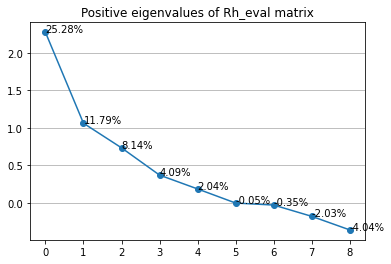

In [90]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= -5:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x *100, 2)).apply(str) +'%'

plt.figure(figsize=(6,4))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

## Критерий Кайзера

In [91]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'
      .format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval >1])))

Критерий Кайзера предлагает 2 фактор(-а/ов).


## Берем два фактора

In [92]:
fact = 2

U = np.empty ((fact,f_len)) 
for i in range(fact):
    U[i]=couple_lst[i][1]

df_U=pd.DataFrame(data=U, index=['Factor_'+str(i +1) for i in range(fact)], columns=features)

df_U

X1        X2        X3        X4        X5        X6  \
Factor_1  0.117417  0.027750  0.023269  0.029832 -0.061350  0.173448   
Factor_2  0.359284  0.129173  0.055377  0.068153 -0.013758 -0.685930   

                X7        X8        X9  
Factor_1  0.382710  0.644326  0.623331  
Factor_2 -0.528967  0.171939  0.257798

In [93]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l)
df_A = pd.DataFrame(data=A, columns=['Factor_'+str(i + 1) for i in range(fact)], index=features)

df_A

Factor_1  Factor_2
X1  0.177121  0.370066
X2  0.041860  0.133050
X3  0.035101  0.057039
X4  0.045001  0.070198
X5 -0.092546 -0.014171
X6  0.261643 -0.706515
X7  0.577311 -0.544841
X8  0.971953  0.177099
X9  0.940282  0.265534

In [94]:
df_A['Factor_1'] *= -1# если не совпал первый столбец
#df_A['Factor_2'] *= -1# если не совпал второй столбец
#df_A['Factor_3'] *= -1# если не совпал третий столбец
df_A

Factor_1  Factor_2
X1 -0.177121  0.370066
X2 -0.041860  0.133050
X3 -0.035101  0.057039
X4 -0.045001  0.070198
X5  0.092546 -0.014171
X6 -0.261643 -0.706515
X7 -0.577311 -0.544841
X8 -0.971953  0.177099
X9 -0.940282  0.265534

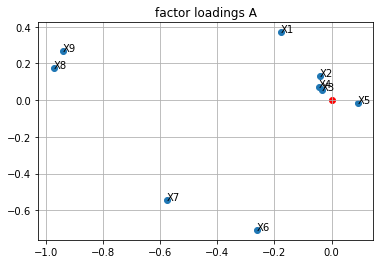

In [95]:
plt.scatter(df_A['Factor_1'], df_A['Factor_2'])
plt.scatter (0, 0, c = 'r')
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable), xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

KeyError: 'Factor_3'

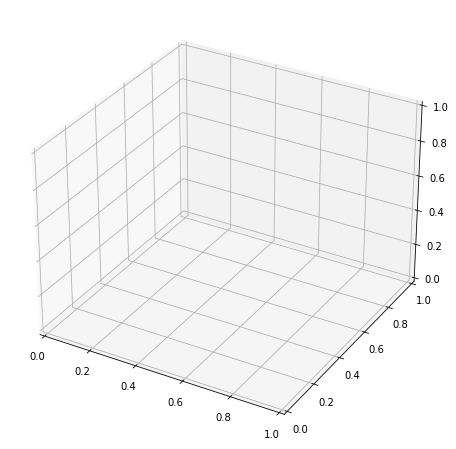

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_A['Factor_1'], df_A['Factor_2'], df_A['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [96]:
def quartimax (X): 
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')

## Вращение в случае двух факторов

In [97]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A,T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column
df_rotation

rad       grad  criteria
0      0.0000   0.000000 -0.114710
1      0.0001   0.005730 -0.114667
2      0.0002   0.011459 -0.114625
3      0.0003   0.017189 -0.114583
4      0.0004   0.022918 -0.114541
...       ...        ...       ...
15703  1.5703  89.971563 -0.114919
15704  1.5704  89.977292 -0.114877
15705  1.5705  89.983022 -0.114835
15706  1.5706  89.988751 -0.114792
15707  1.5707  89.994481 -0.114750

[15708 rows x 3 columns]

## Для трех факторов (выполняется около 10 минут), используем квартимакс в качестве критерия

In [98]:
import tqdm
radx_column = []
gradx_column=[]
rady_column = []
grady_column=[]
radz_column = []
gradz_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.01):
    print(alpha)
    for alpha2 in arange(0, pi/2, 0.01):
        for alpha3 in arange(0, pi/2, 0.01):
            radx_column.append(alpha)
            gradx_column.append(alpha*180/pi)
            rady_column.append(alpha2)
            grady_column.append(alpha2*180/pi)
            radz_column.append(alpha3)
            gradz_column.append(alpha3*180/pi)            
            
            grad = alpha
            grad2 = alpha2
            grad3 = alpha3
            T = [[1, 0, 0],
                 [0, cos(grad), -sin(grad)],
                 [0, sin(grad), cos(grad)]]
            T2 = [[cos(grad2), 0, sin(grad2)],
                 [0, 1, 0],
                 [-sin(grad2), 0, cos(grad2)]]
            T3 = [[cos(grad3), -sin(grad3), 0],
                 [sin(grad3), cos(grad3), 0],
                 [0, 0, 1]]
            B = np.dot(np.dot(np.dot (A,T), T2), T3)
            dict_for_B[criteria('quartimax',B)] = B
            criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['radx'] = radx_column
df_rotation['gradx'] = gradx_column
df_rotation['rady'] = rady_column
df_rotation['grady'] = grady_column
df_rotation['radz'] = radz_column
df_rotation['gradz'] = gradz_column
df_rotation ['criteria'] = criteria_column
df_rotation

0.0


ValueError: shapes (9,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [99]:
criteria_best = df_rotation ['criteria'].max()

criteria_best

-0.04723745124528629

## Вывод лучшего угла вращения для трех факторов

In [100]:
radx_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radx']
gradx_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradx']
rady_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rady']
grady_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grady']
radz_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radz']
gradz_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradz']

print ('Лучший угол для вращения x:{:.3f} y:{:.3f} z:{:.3f} радиан или x:{:.3f} y:{:.3f} z:{:.3f} градусов'
       .format (radx_best, gradx_best, rady_best, grady_best, radz_best, gradz_best))

KeyError: 'radx'

## Вывод лучшего угла вращения для двух факторов

In [101]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']

print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

Лучший угол для вращения :0.285 радиан или 16.318 градусов


## Матрица факторного отображения после вращения

In [102]:
B = dict_for_B [criteria_best]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(fact)], index=features)

df_B

KeyError: -0.04723745124528629

In [104]:
df_B['Factor_1'] *= -1# если не совпал первый столбец
df_B['Factor_2'] *= -1# если не совпал второй столбец

df_B

Factor_1  Factor_2
X1  0.273962 -0.305394
X2  0.077556 -0.115929
X3  0.049713 -0.044879
X4  0.062912 -0.054727
X5 -0.092799 -0.012402
X6  0.052598  0.751568
X7  0.400974  0.685098
X8  0.982560  0.103121
X9  0.977012  0.009349

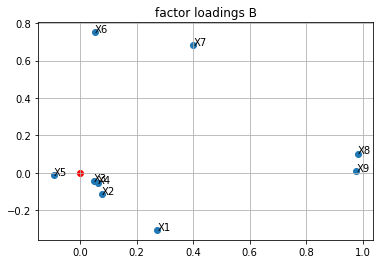

In [105]:
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))

KeyError: 'Factor_3'

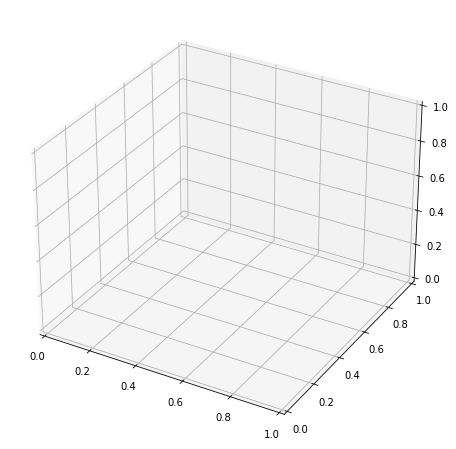

In [79]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_B['Factor_1'], df_B['Factor_2'], df_B['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

## Оценка редуцированной матрицы парных коэффициентов корреляции

In [106]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real,index = features,columns = features)

X1        X2        X3        X4        X5        X6        X7  \
X1  0.168321  0.056651  0.027325  0.033949 -0.021636 -0.215115 -0.099373   
X2  0.056651  0.019455  0.009058  0.011224 -0.005759 -0.083049 -0.048325   
X3  0.027325  0.009058  0.004486  0.005584 -0.004057 -0.031115 -0.010813   
X4  0.033949  0.011224  0.005584  0.006953 -0.005159 -0.037822 -0.012267   
X5 -0.021636 -0.005759 -0.004057 -0.005159  0.008766 -0.014202 -0.045707   
X6 -0.215115 -0.083049 -0.031115 -0.037822 -0.014202  0.567620  0.535987   
X7 -0.099373 -0.048325 -0.010813 -0.012267 -0.045707  0.535987  0.630139   
X8  0.237692  0.064249  0.044218  0.056171 -0.092460  0.129182  0.464628   
X9  0.264809  0.074689  0.048151  0.060954 -0.090782  0.058415  0.398161   

          X8        X9  
X1  0.237692  0.264809  
X2  0.064249  0.074689  
X3  0.044218  0.048151  
X4  0.056171  0.060954  
X5 -0.092460 -0.090782  
X6  0.129182  0.058415  
X7  0.464628  0.398161  
X8  0.976057  0.960936  
X9  0.960936  0.954639

## Оценка остаточной матрицы парных коэффициентов корреляции

In [107]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

X1        X2        X3        X4        X5        X6        X7  \
X1  0.831679  0.156441 -0.070706  0.071143  0.103264 -0.005360  0.061202   
X2  0.156441  0.980545 -0.021346 -0.094555 -0.378334  0.044198  0.052651   
X3 -0.070706 -0.021346  0.995514  0.269949  0.201494 -0.039763  0.043071   
X4  0.071143 -0.094555  0.269949  0.993047  0.025989  0.025503  0.015886   
X5  0.103264 -0.378334  0.201494  0.025989  0.991234 -0.025327  0.028686   
X6 -0.005360  0.044198 -0.039763  0.025503 -0.025327  0.432380  0.091190   
X7  0.061202  0.052651  0.043071  0.015886  0.028686  0.091190  0.369861   
X8 -0.011364 -0.039543  0.026737 -0.004175  0.005166 -0.013653  0.006113   
X9 -0.031954 -0.075714 -0.029241 -0.034576 -0.003669 -0.023565 -0.008245   

          X8        X9  
X1 -0.011364 -0.031954  
X2 -0.039543 -0.075714  
X3  0.026737 -0.029241  
X4 -0.004175 -0.034576  
X5  0.005166 -0.003669  
X6 -0.013653 -0.023565  
X7  0.006113 -0.008245  
X8  0.023943  0.014497  
X9  0.014497  0.045361

## Оценки характерностей

In [108]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
    
charact

[0.911964547484267,
 0.990224969815941,
 0.9977547013139683,
 0.99651749201064,
 0.9956075909833696,
 0.6575559120973383,
 0.6081619480024868,
 0.15473466063335403,
 0.21298095512454637]

## Связь исходных признаков с главными факторами

In [109]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,1], 2, charact[i], i+1))

X1 = -0.370*F1 + -0.177*F2 + 0.912*D1
X2 = -0.133*F1 + -0.042*F2 + 0.990*D2
X3 = -0.057*F1 + -0.035*F2 + 0.998*D3
X4 = -0.070*F1 + -0.045*F2 + 0.997*D4
X5 = 0.014*F1 + 0.093*F2 + 0.996*D5
X6 = 0.706*F1 + -0.262*F2 + 0.658*D6
X7 = 0.545*F1 + -0.577*F2 + 0.608*D7
X8 = -0.177*F1 + -0.972*F2 + 0.155*D8
X9 = -0.266*F1 + -0.940*F2 + 0.213*D9


## Индивидуальные значения главных факторов, полученные методом Бартлетта

In [110]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect'] )
#df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect', 'Factor3_lect'] ) 
#ДЛЯ 3х

df_factor_scores_lect

Factor1_lect  Factor2_lect
0      -0.325528      0.502181
1      -0.656295     -0.000188
2       0.194739     -0.099896
3      -0.724372      0.305794
4       0.304133      0.066015
..           ...           ...
80     -2.391814      0.961095
81     -0.734234      0.578564
82      0.028181     -1.063636
83     -2.140725     -4.700794
84      0.704113      0.108117

[85 rows x 2 columns]

## Индивидуальные значения главных факторов, полученные методом, который используется в программе Statistica

In [111]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat'])
#df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , 
                                      #columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
#для 3х

df_factor_scores_stat

Factor1_stat  Factor2_stat
0      -0.132799      0.489891
1      -0.684487      0.115374
2       0.215938     -0.069201
3      -0.462310      0.244759
4       0.280085      0.078529
..           ...           ...
80     -1.941245      0.757448
81     -0.479276      0.495060
82      0.135142     -0.860620
83     -1.680997     -4.698895
84      0.521051      0.113233

[85 rows x 2 columns]

## Собираем результат

In [112]:
df_result = pd.concat([df_factor_scores_lect, df_factor_scores_stat], axis=1)

df_result

Factor1_lect  Factor2_lect  Factor1_stat  Factor2_stat
0      -0.325528      0.502181     -0.132799      0.489891
1      -0.656295     -0.000188     -0.684487      0.115374
2       0.194739     -0.099896      0.215938     -0.069201
3      -0.724372      0.305794     -0.462310      0.244759
4       0.304133      0.066015      0.280085      0.078529
..           ...           ...           ...           ...
80     -2.391814      0.961095     -1.941245      0.757448
81     -0.734234      0.578564     -0.479276      0.495060
82      0.028181     -1.063636      0.135142     -0.860620
83     -2.140725     -4.700794     -1.680997     -4.698895
84      0.704113      0.108117      0.521051      0.113233

[85 rows x 4 columns]

# Кластеризация

In [113]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('classes.xlsx')
F = pd.DataFrame(factor_scores)
F.columns = ['Factor_' + str(i + 1) for i in range(factor_scores.shape[1])]
F['ward_old'] = classes.ward_old_from0.values
F['kmeans_old'] = classes.kmeans_old_from0.values
F

Factor_1  Factor_2  ward_old  kmeans_old
0  -0.132799  0.489891         4           2
1  -0.684487  0.115374         6           0
2   0.215938 -0.069201         4           2
3  -0.462310  0.244759         4           2
4   0.280085  0.078529         4           2
..       ...       ...       ...         ...
80 -1.941245  0.757448         3           1
81 -0.479276  0.495060         4           2
82  0.135142 -0.860620         2           3
83 -1.680997 -4.698895         0           5
84  0.521051  0.113233         4           2

[85 rows x 4 columns]

In [114]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'CL method')

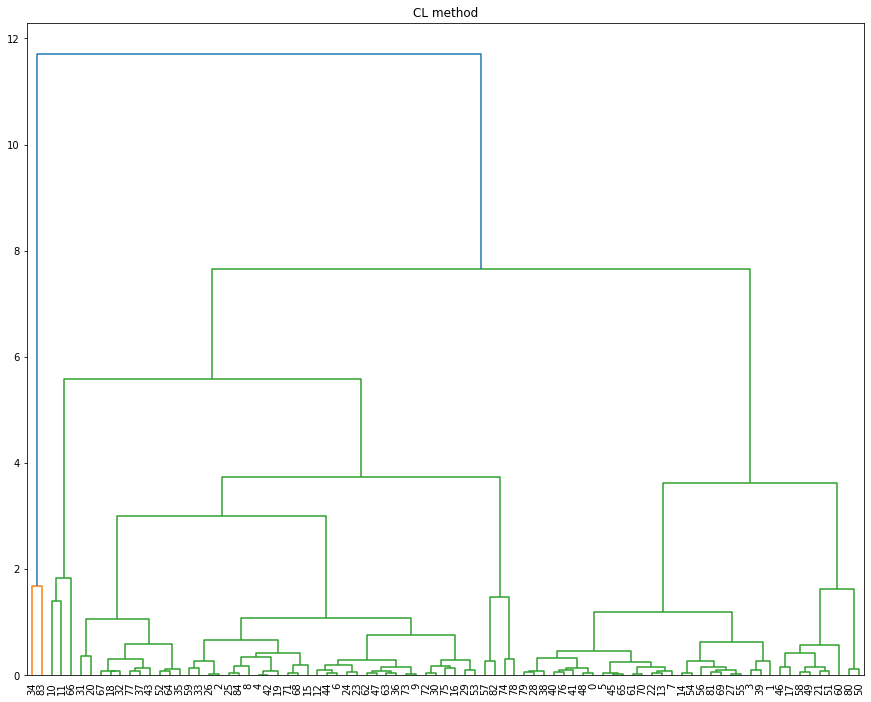

In [115]:
Z = hierarchy.linkage(factor_scores, method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('CL'))

In [116]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(factor_scores)

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(factor_scores)

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

Factor_1  Factor_2  ward_old  kmeans_old  ward_new  kmeans_new
0  -0.132799  0.489891         4           2         5           6
1  -0.684487  0.115374         6           0         5           6
2   0.215938 -0.069201         4           2         3           0
3  -0.462310  0.244759         4           2         5           6
4   0.280085  0.078529         4           2         3           0
..       ...       ...       ...         ...       ...         ...
80 -1.941245  0.757448         3           1         2           2
81 -0.479276  0.495060         4           2         5           6
82  0.135142 -0.860620         2           3         4           4
83 -1.680997 -4.698895         0           5         1           1
84  0.521051  0.113233         4           2         3           0

[85 rows x 6 columns]

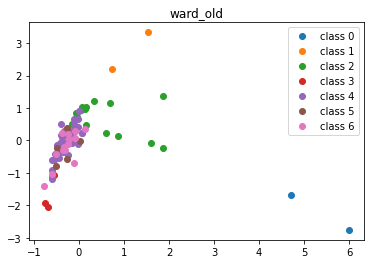

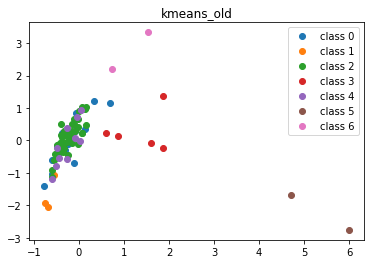

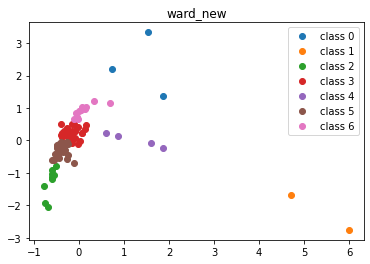

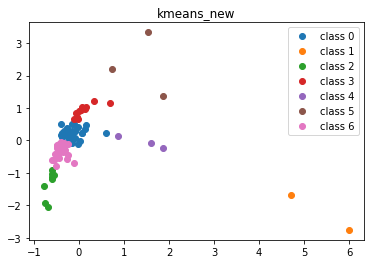

In [125]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(-data.Factor_2, data.Factor_1, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

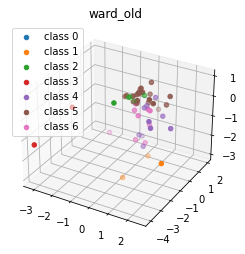

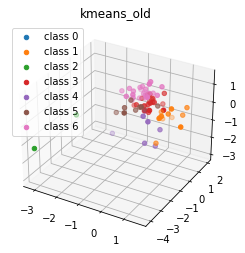

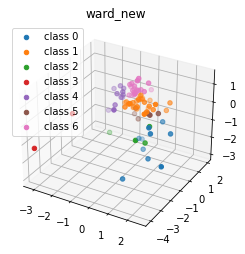

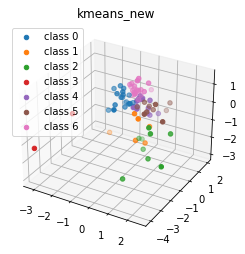

In [51]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [70]:
#df_result.to_excel('4lab_result.xlsx')
F.to_excel('4lab_result.xlsx')